In [1]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#using numpy
import numpy as np

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
lr = 0.001
batch_size = 32
epochs = 5

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((256, 256)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [4]:
train_dir = 'Dataset/train'
val_dir = 'Dataset/test'

In [5]:
train_folder = datasets.ImageFolder(root=train_dir,transform=transform)
val_folder = datasets.ImageFolder(root=val_dir,transform=transform)

In [6]:
train_folder.classes

['not_pizza', 'pizza']

In [7]:
train_loader = DataLoader(train_folder,
                          batch_size=batch_size,
                          shuffle=True)
val_loader = DataLoader(val_folder,
                          batch_size=batch_size,
                          shuffle=True)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # input [3, 256, 256]
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),  # [64, 256, 256]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),      # [64, 128, 128]

            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1), # [128, 128, 128]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),      # [128, 64, 64]

            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, stride = 1, padding = 1), # [256, 64, 64]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),      # [256, 32, 32]

            nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, stride = 1, padding = 1), # [512, 32, 32]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),       # [512, 16, 16]
            
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, stride = 1, padding = 1), # [512, 16, 16]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),       # [512, 8, 8]
        )
        self.fc = nn.Sequential(
            nn.Linear(in_features = 512*8*8, out_features = 1024),
            nn.ReLU(),
            nn.Linear(in_features = 1024, out_features = 512),
            nn.ReLU(),
            nn.Linear(in_features = 512, out_features = 128), 
            nn.ReLU(), 
            nn.Linear(in_features = 128, out_features = 2)
        )

    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.size()[0], -1)
        return self.fc(out)
net = Net()

In [9]:
for p in net.parameters():
    print(p.shape)

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([1024, 32768])
torch.Size([1024])
torch.Size([512, 1024])
torch.Size([512])
torch.Size([128, 512])
torch.Size([128])
torch.Size([2, 128])
torch.Size([2])


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
print('Using: ',device)
net.to(device)

Using:  cuda


Net(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14

In [11]:
print("total allocated memory on gpu (pytorch):", torch.cuda.memory.memory_allocated(device))

total allocated memory on gpu (pytorch): 152256000


In [12]:
# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

#Adam optimizer
optimizer = optim.Adam(net.parameters())

In [13]:
from tqdm import tqdm

for epoch in range(epochs):
    train_acc = np.array([])
    val_acc = np.array([])
    train_loss = np.array([])
    val_loss = np.array([])

    loop = tqdm(train_loader, leave=True)
    net.train()
    for batch in loop:
        optimizer.zero_grad()
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        #print(x.shape)
        y_pred = net(inputs)

        #print(np.argmax(y_pred.cpu().data.numpy(),axis=1), labels.cpu().numpy(), sep="\n")
        #print(calculate_accuracy(np.argmax(y_pred.cpu().data.numpy(),axis=1), labels.cpu().numpy()))
        #print(np.argmax(y_pred.cpu().data.numpy(),axis=1)== labels.cpu().numpy())
        #print(np.sum(np.argmax(y_pred.cpu().data.numpy(),axis=1)== labels.cpu().numpy())) # эта хуйня считает количество верных предиктов
        
        loss = error(y_pred,labels.long())
        loss.backward()
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=np.mean(train_loss), Accuracy=np.mean(train_acc))
        optimizer.step()
        train_acc = np.append(train_acc, np.sum(np.argmax(y_pred.cpu().data.numpy(),axis=1)== labels.cpu().numpy()) / batch_size)
        train_loss = np.append(train_loss, loss.item())
    net.eval()
    with torch.no_grad():
        loop = tqdm(val_loader, leave=True)
        for batch in loop:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            val_pred = net(inputs)
            batch_loss = error(val_pred,labels.long())
            loop.set_description(f"Validation {epoch+1}")
            loop.set_postfix(loss=np.mean(val_loss), Accuracy=np.mean(val_acc))
            val_acc = np.append(val_acc, np.sum(np.argmax(val_pred.cpu().data.numpy(),axis=1)== labels.cpu().numpy()) / batch_size)
            val_loss = np.append(val_loss, batch_loss.item())

        #print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f | Val Acc: %3.6f loss: %3.6f' % \
            #(epoch + 1, epochs, time.time()-epoch_start_time, np.mean(train_acc), train_loss/len(train_folder), np.mean(val_acc), val_loss/len(test_folder)))

Epoch 1:   0%|          | 0/50 [00:14<?, ?it/s]c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Validation 5: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s, Accuracy=0.824, loss=0.443]


In [7]:
model = torch.load("Pizza_prediction.pth")


In [12]:
from torch.autograd import Variable
from PIL import Image

def predict_image(image_path, model, device):
    image = Image.open(image_path)

    transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((256, 256)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )

    image_tensor = transform(image).float()
    image_tensor = image_tensor.unsqueeze(0)

    if torch.cuda.is_available() and device == "cuda":
        image_tensor.cuda()
        input = Variable(image_tensor.cuda(), requires_grad=True) #torch.Tensor(image_tensor.cuda(), requires_grad=True)
    else:
        input = Variable(image_tensor.cuda(), requires_grad=True) #torch.Tensor(image_tensor.cuda(), requires_grad=True)
    output = model(input)
    #print(output)
    label = output.data.cpu().numpy().argmax()
    plt.imshow(image)
    if label == 0:
        return "not_pizza"
    if label == 1:
        return "pizza"
    return label

not_pizza


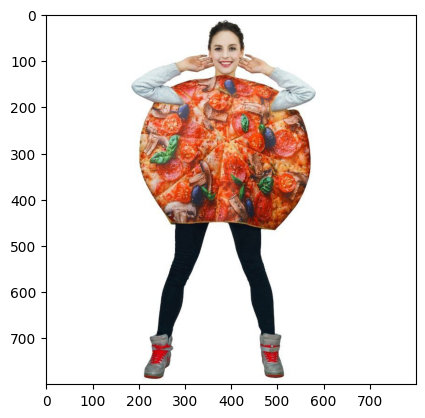

In [15]:
print(predict_image(r"C:\Users\PC\Downloads\photo_2022-11-29_18-47-46.jpg", model, device))